In [1]:
# # ! pip install --upgrade pip
import tensorflow as tf
import keras
print ('Tf Version:', tf.__version__)
import PIL
print ('Pillow Version:', PIL.__version__)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import SGD,Adam
from keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
import os


Tf Version: 2.3.1
Pillow Version: 7.2.0


In [2]:
im=[]
path=os.path.join(os.getcwd(),'ICH_dataBatch')
for images in os.listdir(path):
    img_path=os.path.join(path,images)
    img = image.load_img(img_path,color_mode = "grayscale")
    img=  image.img_to_array(img)
    img = img/255
    im.append(img)
im=np.array(im)

In [3]:
label= pd.read_csv('label_training.csv')
label=np.array(label)
label = to_categorical(label)
label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [4]:
from sklearn.model_selection import train_test_split
X,Xt,y,yt=train_test_split(im,label,test_size=0.05)

In [5]:
model = Sequential()
# model.add(keras.Input(shape=(128,128,1)))
model.add(Conv2D(1,kernel_size=(3, 3),activation='relu',padding='same',input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(64,kernel_size=(3, 3),strides=(2,2),activation='tanh',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(32,kernel_size=(3, 3),strides=(2,2),activation='tanh',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(16,kernel_size=(3, 3),strides=(2,2),activation='tanh',padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
# model.summary()
history=model.fit(X, y, epochs=50, validation_data=(Xt, yt))

Epoch 1/50
57/57 [==============================] - 15s 258ms/step - loss: 0.4258 - accuracy: 0.7764 - val_loss: 0.7712 - val_accuracy: 0.2211
Epoch 2/50
57/57 [==============================] - 14s 243ms/step - loss: 0.2769 - accuracy: 0.8751 - val_loss: 0.7144 - val_accuracy: 0.6421
Epoch 3/50
57/57 [==============================] - 14s 243ms/step - loss: 0.2781 - accuracy: 0.8717 - val_loss: 0.7060 - val_accuracy: 0.6105
Epoch 4/50
57/57 [==============================] - 14s 243ms/step - loss: 0.2120 - accuracy: 0.9108 - val_loss: 0.5829 - val_accuracy: 0.6737
Epoch 5/50
57/57 [==============================] - 14s 245ms/step - loss: 0.1474 - accuracy: 0.9476 - val_loss: 0.3289 - val_accuracy: 0.8526
Epoch 6/50
57/57 [==============================] - 14s 243ms/step - loss: 0.1498 - accuracy: 0.9403 - val_loss: 0.2678 - val_accuracy: 0.8737
Epoch 7/50
57/57 [==============================] - 14s 242ms/step - loss: 0.1214 - accuracy: 0.9543 - val_loss: 0.1990 - val_accuracy: 0.9158

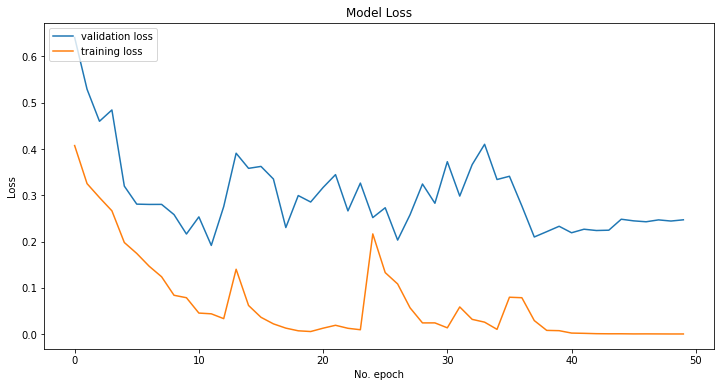

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['loss'],label='training loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

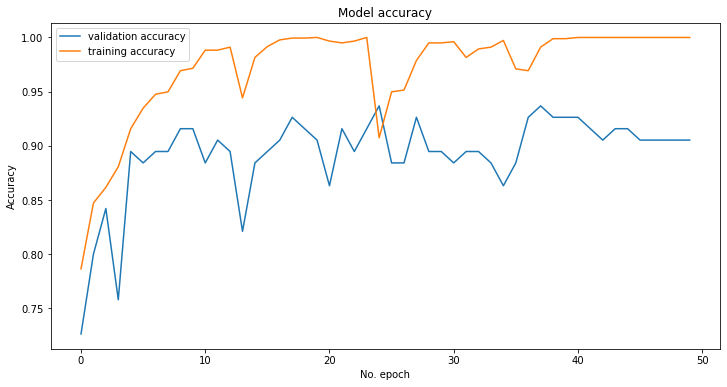

In [51]:
plt.figure(figsize=(12,6))
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [43]:
testpath=os.path.join(os.getcwd(),'ICH_dataFinal')
im_test=[]
for images in os.listdir(testpath):
    img_path=os.path.join(testpath,images)
    img = image.load_img(img_path,color_mode = "grayscale")
    img=  image.img_to_array(img)
    img = img/255
    im_test.append(img)
im_test=np.array(im_test)

label_test= pd.read_csv('label_final.csv')
label_test=label_test.to_numpy()
label_test
label_test = to_categorical(label_test)
label_test
y_predict=model.predict(im_test)
y_predict = np.argmax(y_predict, axis = 1)
model.evaluate(im_test,label_test,verbose=1)

15/15 [==============================] - 0s 23ms/step - loss: 0.1964 - accuracy: 0.9407


[0.19644494354724884, 0.9406779408454895]

Precision score is  0.8415841584158416
Recall score is  0.8762886597938144

Confusion matrix


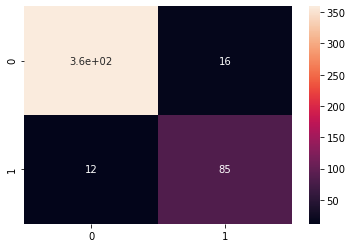

In [79]:
# label_test = np.argmax(label_test, axis = 1)
from sklearn.metrics import confusion_matrix,precision_score,recall_score

cm=confusion_matrix(label_test,y_predict)
print('Precision score is ',precision_score(label_test,y_predict))
print('Recall score is ',recall_score(label_test,y_predict))

import seaborn as sns
sns.heatmap(cm,annot=True)
print('\nConfusion matrix')